In [8]:
from pprint import pprint
import matplotlib.pyplot as plt
import shap
import pickle
import cloudpickle
import numpy as np
import scipy as sp
import pandas as pd
from util import RuleClassifier, get_complexity, evaluate_counterfactual_fidelity
from comparers import ModelComparer, plot_decision_boundary
from explainers import generate_shap_explanations, calc_feature_order, calc_class_order,\
                       plot_feature_importance_bar, plot_class_importances, print_rules,\
                       plot_feature_dependencies
from clustering import make_clustering
from tasks.feature_ignored import make_task
shap.initjs()
%matplotlib inline

# Setup Task

In [2]:
clf_a, clf_b, X, y, feature_names, feature_precisions = make_task()

In [3]:
xlim = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
ylim = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

## Individual Classifiers

In [29]:
with open('indiv.labels.shap', 'rb') as f:
    shap_values_labels = pickle.load(f)

In [30]:
with open('indiv.proba.shap', 'rb') as f:
    shap_values_proba = pickle.load(f)

In [31]:
with open('indiv.log_odds.shap', 'rb') as f:
    shap_values_log_odds = pickle.load(f)

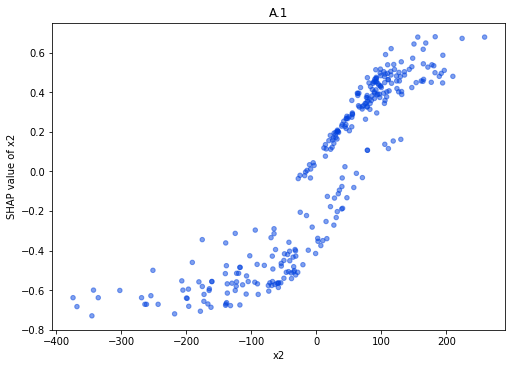

In [32]:
plot_feature_dependencies(shap_values_labels[:, 'x2', 'A.1'], alpha=0.5)

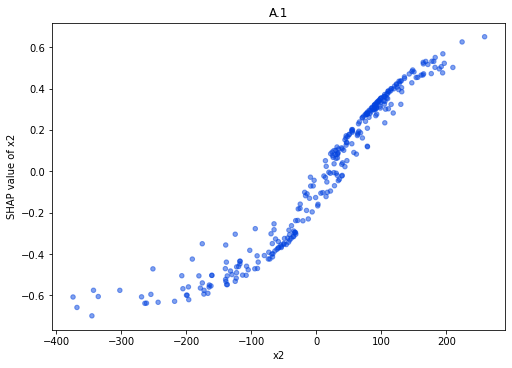

In [33]:
plot_feature_dependencies(shap_values_proba[:, 'x2', 'A.1'], alpha=0.5)

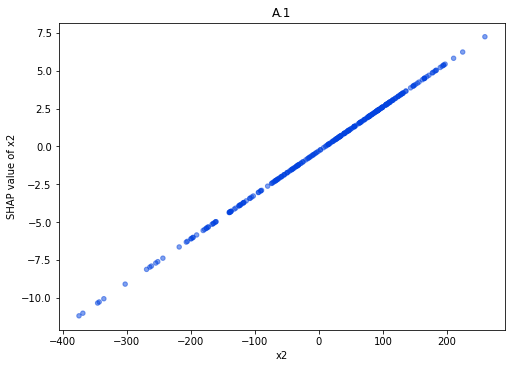

In [34]:
plot_feature_dependencies(shap_values_log_odds[:, 'x2', 'A.1'], alpha=0.5)

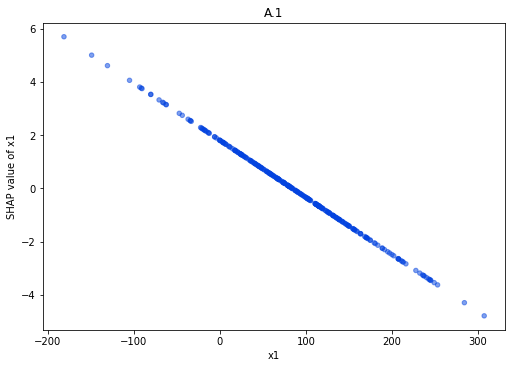

In [35]:
plot_feature_dependencies(shap_values_log_odds[:, 'x1', 'A.1'], alpha=0.5)

## Difference Classifier

In [4]:
comparer = ModelComparer(clf_a, clf_b, feature_names)

In [5]:
with open('diffclf.labels.shap', 'rb') as f:
    shap_values_labels = pickle.load(f)

In [6]:
with open('diffclf.proba.shap', 'rb') as f:
    shap_values_proba = pickle.load(f)

In [7]:
with open('diffclf.log_odds.shap', 'rb') as f:
    shap_values_log_odds = pickle.load(f)

In [11]:
focus_class_idx, focus_class = comparer.check_class('(0, 1)')
is_focus_class = comparer.predict_mclass_diff(X) == focus_class_idx

Constant, up to approx. 0, then step upward, continuing in a concave downwards shaped curve. High vertical spread.

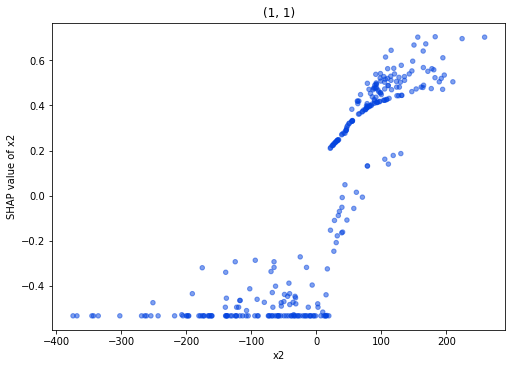

In [19]:
plot_feature_dependencies(shap_values_labels[:, 'x2', '(1, 1)'], alpha=0.5)

monotonically increasing, sigmoid shaped curve

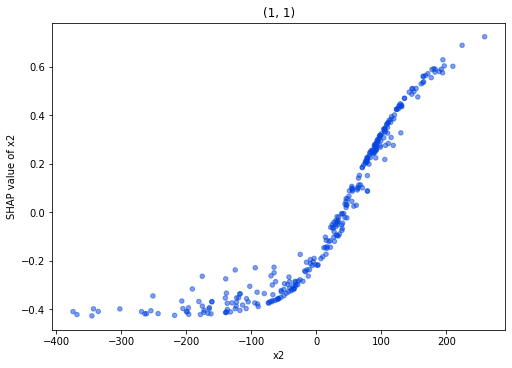

In [20]:
plot_feature_dependencies(shap_values_proba[:, 'x2', '(1, 1)'], alpha=0.5)

monotonically increasing, concave downwards

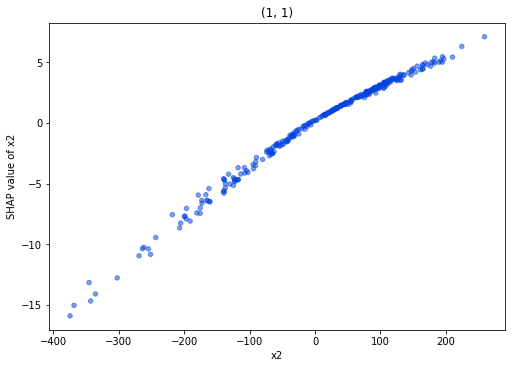

In [21]:
plot_feature_dependencies(shap_values_log_odds[:, 'x2', '(1, 1)'], alpha=0.5)